In [1]:
import os
import sys
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import osgeo
import pandas as pd

%matplotlib inline

In [2]:
sys.path.append(r"cropburn")
from timeseries_sep import *

## Compare seperability of tilled vs. burned

In [3]:
### DFs already created and stored in DataDir as 'TS_polyData_<polySource>_<band>.csv' for burned samples
###    or 'TSTilled_polyData_<polySource>_<band>.csv' for Tilled samples.
###    to create new DF, use: get_ts_for_all_pixels(field_list, Sentinel_dir, 9, out_dir, 3, 'SWIR2') etc.
###    see Plot_Separability notebook
data_dir = './data/Walker2023RS/TSpoly_dataframes'
out_dir = './data/temp'

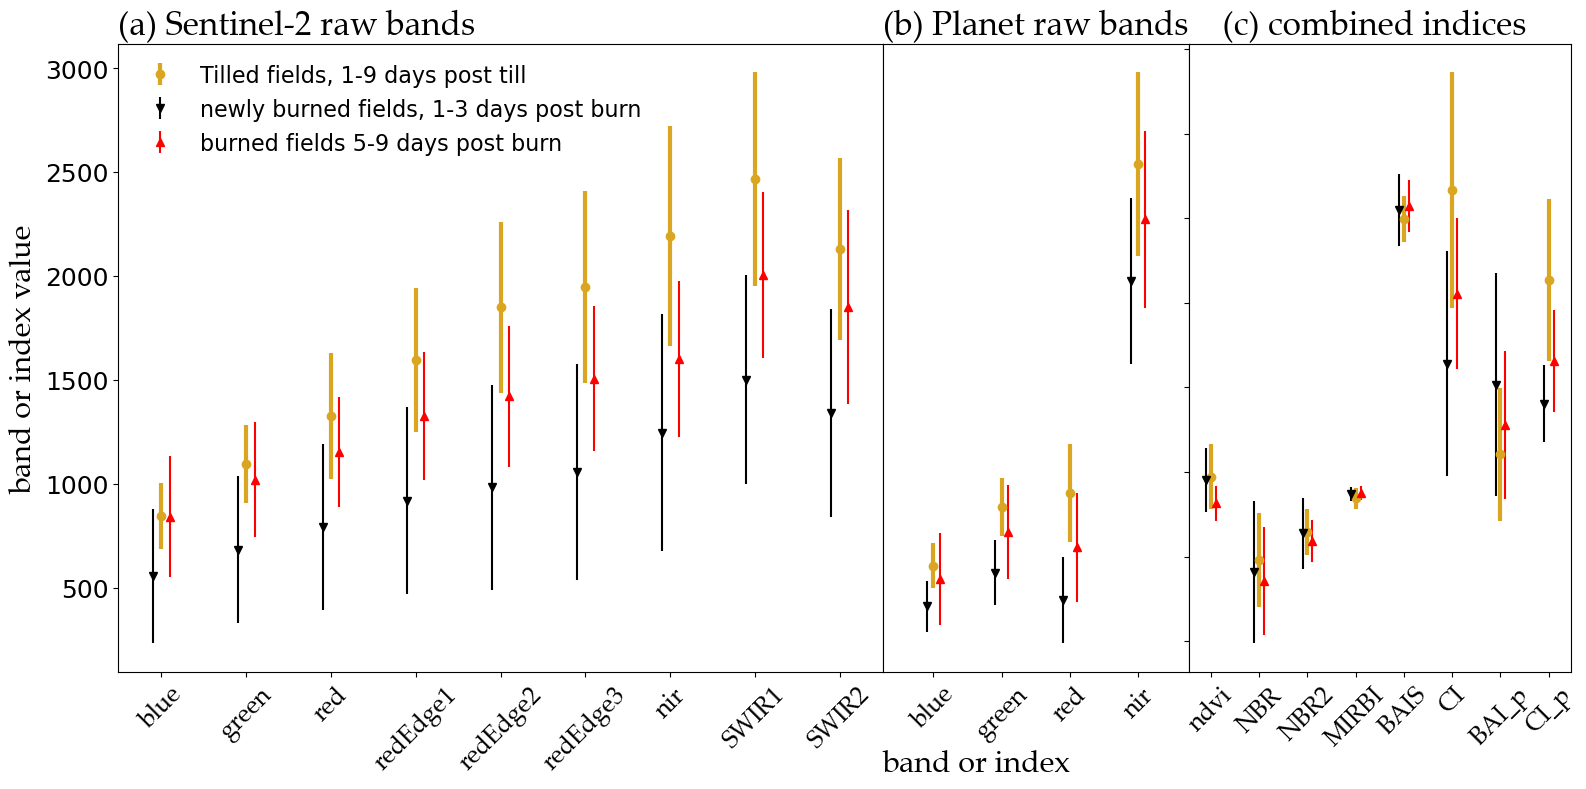

In [4]:
df_all_sentinel = get_bandvals_tilled_vs_burned(data_dir,out_dir,'SentinelV4','raw')
s_bands = ['blue','green','red','redEdge1','redEdge2','redEdge3','nir','SWIR1','SWIR2']

df_all_planet = get_bandvals_tilled_vs_burned(data_dir,out_dir,'PlanetV4','raw')
p_bands = ['blue','green','red','nir']

s_bands_i = ['ndvi','NBR','NBR2','MIRBI','BAIS','CI']
p_bands_i = ['BAI_p','CI_p']
df_all_sentinel_i = get_bandvals_tilled_vs_burned(data_dir,out_dir,'SentinelV4','index',s_bands_i,0)
df_all_planet_i = get_bandvals_tilled_vs_burned(data_dir,out_dir,'PlanetV4','index',['BAI','CI'],len(s_bands_i))
df_all_indices = pd.concat([df_all_sentinel_i,df_all_planet_i])
bands_i = s_bands_i + p_bands_i

fig = plt.figure(figsize=(16, 8)) 
#fig, (a0, a1) = plt.subplots(1, 2, width_ratios=[2, 1]) #This should work with more recent MatPlotLib
gs = gridspec.GridSpec(1, 3, width_ratios=[2, .8, 1], wspace=0)

a0 = plt.subplot(gs[0])
a0.errorbar(df_all_sentinel.index, df_all_sentinel['Tilled_ALL'], yerr=df_all_sentinel['Tilled_stdv'], fmt='o', color='goldenrod', linewidth=3, label='Tilled fields, 1-9 days post till')
a0.errorbar(df_all_sentinel.index, df_all_sentinel['BurnedNew_ALL'], yerr=df_all_sentinel['BurnedNew_stdv'], fmt='v', color='black', label='newly burned fields, 1-3 days post burn')
a0.errorbar(df_all_sentinel.index, df_all_sentinel['BurnedOld_ALL'], yerr=df_all_sentinel['BurnedOld_stdv'], fmt='^', color='r', label='burned fields 5-9 days post burn')
a0.set_xticks(range(len(s_bands)), minor=False)
a0.set_xticklabels(s_bands, fontdict=None, minor=False, fontname='Palatino Linotype')
a0.set_ylabel('band or index value', fontsize = 22, fontname='Palatino Linotype') 
a0.tick_params(axis='x', labelrotation=45, labelsize=18)
a0.set_title('(a) Sentinel-2 raw bands', fontsize="24", loc='left', fontname='Palatino Linotype')
a0.legend(loc='upper left', fontsize="16", frameon=False)
a0.tick_params(axis='y', labelsize=18)

a1 = plt.subplot(gs[1])
a1.errorbar(df_all_planet.index,df_all_planet['Tilled_ALL'], yerr=df_all_planet['Tilled_stdv'], fmt='o', color='goldenrod', linewidth=3, label='Tilled fields, 1-9 days post till')
a1.errorbar(df_all_planet.index, df_all_planet['BurnedNew_ALL'], yerr=df_all_planet['BurnedNew_stdv'], fmt='v', color='black', label='newly burned fields, 1-3 days post burn')
a1.errorbar(df_all_planet.index, df_all_planet['BurnedOld_ALL'], yerr=df_all_planet['BurnedOld_stdv'], fmt='^', color='r', label='burned fields 5-9 days post burn')
a1.set_xticks(range(len(p_bands)), minor=False)
a1.set_xticklabels(p_bands, fontdict=None, minor=False, fontname='Palatino Linotype')
a1.set(yticklabels=[])
a1.set(ylabel=None)
a1.set_title('(b) Planet raw bands', fontsize="24", loc='left', fontname='Palatino Linotype')
a1.tick_params(axis='x', labelrotation=45, labelsize=18)
a1.margins(x=0.2)
a1.set_xlabel('band or index', fontsize="22", loc='left', fontname='Palatino Linotype')
a1.tick_params(left=False)

a2 = plt.subplot(gs[2])
a2.errorbar(df_all_indices.index, df_all_indices['Tilled_ALL'], yerr=df_all_indices['Tilled_stdv'], fmt='o', color='goldenrod', linewidth=3, label='Tilled fields, 1-9 days post till')
a2.errorbar(df_all_indices.index, df_all_indices['BurnedNew_ALL'], yerr=df_all_indices['BurnedNew_stdv'], fmt='v', color='black', label='newly burned fields, 1-3 days post burn')
a2.errorbar(df_all_indices.index, df_all_indices['BurnedOld_ALL'], yerr=df_all_indices['BurnedOld_stdv'], fmt='^', color='r', label='burned fields 5-9 days post burn')
a2.set_xticks(range(len(bands_i)), minor=False)
a2.set_xticklabels(bands_i, fontdict=None, minor=False, fontname='Palatino Linotype')
a2.set(yticklabels=[])
a2.set(ylabel=None)
a2.set_title('    (c) combined indices', fontsize = 24, loc='left', fontname='Palatino Linotype')
a2.tick_params(axis='x', labelrotation=45, labelsize=18)

plt.tight_layout();
#plt.savefig('grid_figure.pdf');